In [1]:
import nltk
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
text_eng  = " Don't hesitate to ask questions"
text_kor  = """삼성 갤럭시(GalaxyNote)노트의 신형을 홍보 합니다. 
홍보:유관순   031-478-2311  010-8888-9999.
삼성 페이지 https://www.samsung.com/sec/index.html"""

[nltk_data] Downloading package punkt to /Users/masterp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/masterp/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/masterp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from nltk import sent_tokenize, word_tokenize, FreqDist
sent_tokenize(text_kor)

['삼성 갤럭시(GalaxyNote)노트의 신형을 홍보 합니다.',
 '홍보:유관순   031-478-2311  010-8888-9999.',
 '삼성 페이지 https://www.samsung.com/sec/index.html']

In [3]:
from konlpy.tag import Okt, Kkma, Hannanum
twitter = Okt()
text = "파이썬을 활용하여 자연어 분석 특강입니다"
print(twitter.pos(text, stem=True))

/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('파이썬', 'Noun'), ('을', 'Josa'), ('활용', 'Noun'), ('하다', 'Verb'), ('자연어', 'Noun'), ('분석', 'Noun'), ('특강', 'Noun'), ('이다', 'Adjective')]


In [4]:
print(twitter.pos(text))

[('파이썬', 'Noun'), ('을', 'Josa'), ('활용', 'Noun'), ('하여', 'Verb'), ('자연어', 'Noun'), ('분석', 'Noun'), ('특강', 'Noun'), ('입니다', 'Adjective')]


In [5]:
%%time
kkma = Kkma()
print(kkma.pos(text))

[('파이', 'NNG'), ('썰', 'VV'), ('ㄴ', 'ETD'), ('을', 'NNG'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('자연어', 'NNG'), ('분석', 'NNG'), ('특강', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]
CPU times: user 13.6 s, sys: 305 ms, total: 13.9 s
Wall time: 3.33 s


In [6]:
%%time
han = Hannanum()
print(han.pos(text))

[('파이썬', 'N'), ('을', 'J'), ('활용', 'N'), ('하', 'X'), ('어', 'E'), ('자연어', 'N'), ('분석', 'N'), ('특강', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]
CPU times: user 1.53 s, sys: 55 ms, total: 1.59 s
Wall time: 303 ms


In [7]:
with open('타짜대본.txt', 'r') as f:
    text = f.readlines()

In [8]:
import re
result, tokenizer = [], re.compile(r'^\d+')
for t in text:
    if t.replace(" ","").find('곽철용') != -1:
        if "".join(tokenizer.findall(t)):
            pass
        elif t.replace(" ",'').find(':') != -1:
            result.append(" ".join(t.split(":")[1:]))
        else:
            result.append(t.replace('\t', ''))

In [9]:
from konlpy.tag import Mecab

result = " ".join(result)
token_kcw = [_ for _ in Mecab().nouns(result) if len(_)>2]
token_kcw_unique = list(set(token_kcw))
len(token_kcw_unique)

40

(-0.5, 399.5, 199.5, -0.5)

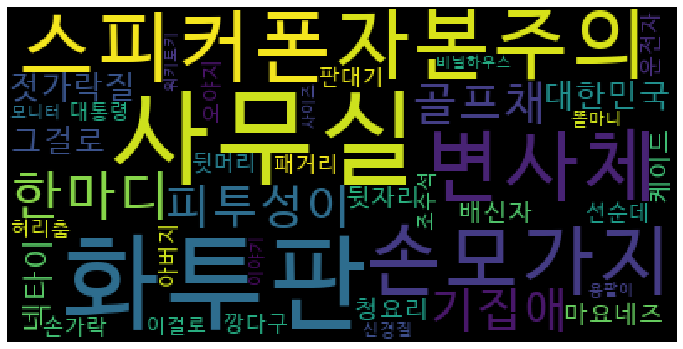

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
font_file = "D2Coding.ttf"
wcloud = WordCloud(font_file).generate(" ".join(token_kcw_unique))
plt.figure(figsize=(12,12))
plt.imshow(wcloud)
plt.axis("off")

In [12]:
from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze(result):
    print(word)

박무석	박무석/NNG
뒤쪽으로	뒤쪽/NNG + 으로/JKB
이	이/MM
비닐하우스	비닐하우스/NNG
주인인	주인/NNG + 이/VCP + ㄴ/ETM
곽철용이	곽철용/NNP + 이/JKS
인상을	인상/NNG + 을/JKO
찌푸린다.	찌푸리/VV + ㄴ다/EF + ./SF
저새끼!	저새끼/NNG + !/SF
얼마야?	얼/NNG + 마/NNB + 야/JKV + ?/SF
되보이는데요?	되/VV + 아/EC + 보/VX + 이/VV + 는데요/EF + ?/SF
가서	가/VV + 아서/EC
확인해.	확인/NNG + 하/XSV + 아/EF + ./SF
여기	여기/NP
판대기	판대기/NNG
오야지가	오/VV + 야지/NNG + 가/JKS
누군줄	누구/NP + 이/VCP + ㄴ줄/EC
알아?	알/VV + 아/EF + ?/SF
곽철용이야.	곽철용/NNP + 이/VCP + 야/EF + ./SF
곽철용	곽철용/NNP
몰라?	모르/VV + 아/EF + ?/SF
고니가	고니/NNP + 가/JKS
돌아보면,	돌아보/VV + 면/EC + ,/SP
모니터를	모니터/NNG + 를/JKO
지켜보며,	지켜보/VV + 며/EC + ,/SP
근엄하게	근엄/XR + 하/XSA + 게/EC
앉아있는	앉/VV + 아/EC + 있/VX + 는/ETM
곽철용.	곽철용/NNP + ./SF
젊은	젊/VA + 은/ETM
친구!	친구/NNG + !/SF
돈이란	돈/NNG + 이/VCP + 란/ETM
게	것/NNB + 이/JKS
말야	말/NNG + 이/VCP + 야/EC
독기가	독기/NNG + 가/JKS
세거든.	세/NP + 거든/EF + ./SF
어이.	어이/IC + ./JX
무석아!	무/VA + 석/NNG + 아/NNP + !/SF
정식으로	정식/NNG + 으로/JKB
한판	한판/NNG
해줘야지.	하/VV + 여/EC + 주/VX + 어야지/EF + ./SF
얘들아!	얘/IC + 들/XSN + 아/JKV + !/SF
이	이/MM
분이	분/NNB + 이/JKS
담이	담/NNG + 이/JKS
작으시댄다.	작/VA +